<a href="https://colab.research.google.com/github/dzuokumor/group-22-formative-3/blob/main/gradient_descent_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [54]:
# Define data points
x = np.array([1, 3])
y = np.array([3, 6])
n = len(x)

In [55]:
# Define the cost function (Mean Squared Error)
def mse(params):
    m, b = params
    y_pred = m * x + b
    return np.mean((y - y_pred) ** 2)

In [56]:
# Track m, b, and error values manually during optimization
m_values = []
b_values = []
errors = []

In [57]:
# Callback to record progress on each step (iteration)
def record_step(params):
    m, b = params
    y_pred = m * x + b
    error = np.mean((y - y_pred) ** 2)
    m_values.append(m)
    b_values.append(b)
    errors.append(error)
    print(f"Step {len(m_values)}: m={m:.4f}, b={b:.4f}, error={error:.4f}")

In [58]:
# Initial guess
initial_guess = [-1, 1]

In [59]:
# Minimize the cost function using SciPy
result = minimize(
    mse,
    initial_guess,
    method='BFGS',         # A built-in gradient-based optimization method
    callback=record_step,  # Track updates
    options={'disp': True, 'maxiter': 3}  # Only 3 iterations to match your manual steps
)

Step 1: m=-0.0646, b=1.3811, error=12.9991
Step 2: m=1.3793, b=1.7914, error=0.0171
Step 3: m=1.4214, b=1.6915, error=0.0074
         Current function value: 0.007357
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [60]:
# Step Final optimized values
final_m, final_b = result.x
print(f"\nFinal optimized values: m = {final_m:.4f}, b = {final_b:.4f}")


Final optimized values: m = 1.4214, b = 1.6915


In [61]:
# Step 8: Plotting
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

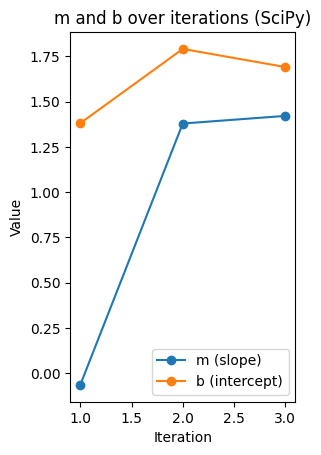

In [62]:
# Plot 1: m and b over iterations
plt.subplot(1, 2, 1)
plt.plot(range(1, len(m_values)+1), m_values, label='m (slope)', marker='o')
plt.plot(range(1, len(b_values)+1), b_values, label='b (intercept)', marker='o')
plt.title("m and b over iterations (SciPy)")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

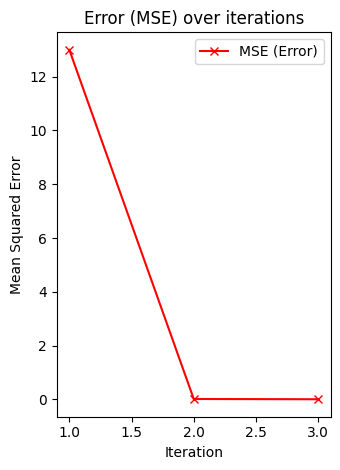

In [63]:
# Plot 2: Error over iterations
plt.subplot(1, 2, 2)
plt.plot(range(1, len(errors)+1), errors, label='MSE (Error)', color='red', marker='x')
plt.title("Error (MSE) over iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.tight_layout()
plt.show()